# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = study_results.merge(mouse_metadata, on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_ids = duplicate_mice['Mouse ID'].unique().tolist()
unique_ids

['g989']

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_ids = duplicate_mice['Mouse ID'].unique()
filtered_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_ids)]
filtered_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [13]:
# Checking the number of mice in the clean DataFrame.
filtered_df['Mouse ID'].nunique()

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = filtered_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).round(2)
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']
summary_stats.reset_index(inplace=True)
summary_stats.set_index('Drug Regimen', inplace=True)
summary_stats


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = filtered_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.reset_index(inplace=True)
summary_stats.set_index('Drug Regimen', inplace=True)
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

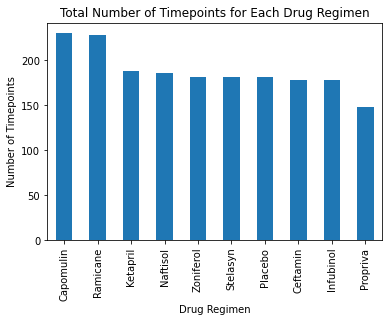

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_counts = filtered_df['Drug Regimen'].value_counts().sort_values(ascending=False)

timepoints_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.show()

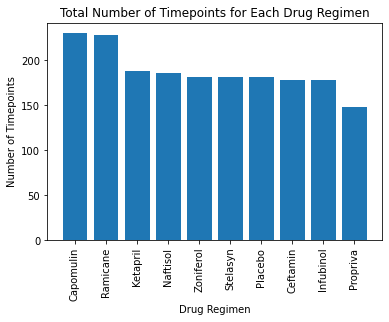

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_counts = filtered_df['Drug Regimen'].value_counts().sort_values(ascending=False)

plt.bar(timepoints_counts.index, timepoints_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()


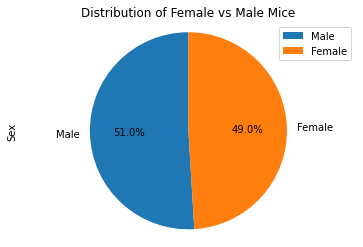

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = filtered_df['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.legend()
plt.show()


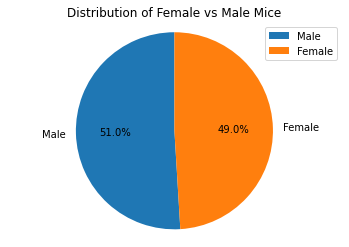

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = filtered_df['Sex'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers.tolist()}")

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.321345799999996]
Potential outliers for Ceftamin: []


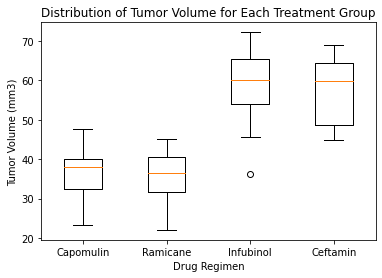

In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group
tumor_vol_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] 
                  for treatment in treatments]

# Create the box plot
plt.boxplot(tumor_vol_data, labels=treatments)

# Set labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()


## Line and Scatter Plots

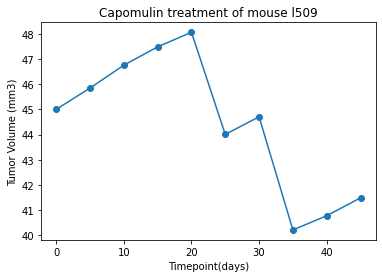

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Choose a mouse ID treated with Capomulin
mouse_id = 'l509'

# Filter the data for the chosen mouse ID and Capomulin treatment
mouse_data = filtered_df.loc[(filtered_df['Mouse ID'] == mouse_id) & (filtered_df['Drug Regimen'] == 'Capomulin')]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Set labels and title
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')

# Show the plot
plt.show()


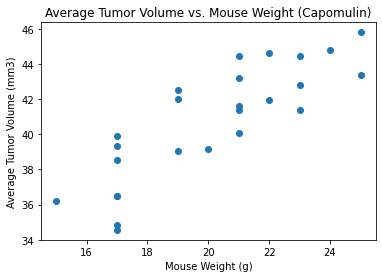

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = filtered_df[filtered_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').mean()

# Create the scatter plot
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')

# Show the plot
plt.show()

## Correlation and Regression

Correlation coefficient: 0.84
Linear regression: y = 0.95x + 21.55


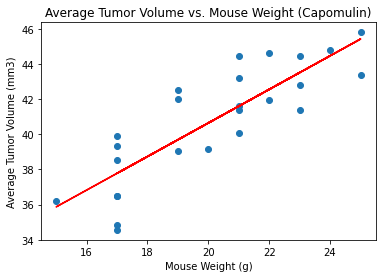

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = filtered_df[filtered_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').mean()

# Create the scatter plot
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')

# Calculate the correlation coefficient
correlation_coef, p_value = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation_coef:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
print(f"Linear regression: y = {slope:.2f}x + {intercept:.2f}")

# Add the linear regression line to the plot
regression_line = slope * average_data['Weight (g)'] + intercept
plt.plot(average_data['Weight (g)'], regression_line, color='red')

# Show the plot
plt.show()